In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [27]:
df = pd.read_csv('MonthlyEnergyDemandData.csv')
df

,Date(YMD),Demand
0,2015-07-01,21312
1,2015-08-01,21299
2,2015-09-01,19707
3,2015-10-01,16206
4,2015-11-01,16458
...,...,...
76,2021-11-01,16113
77,2021-12-01,16997
78,2022-01-01,18772
79,2022-02-01,17868


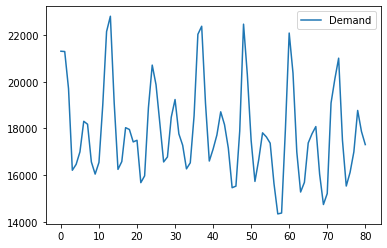

In [28]:
df.plot()

In [29]:
df['year'] = pd.DatetimeIndex(df['Date(YMD)']).year

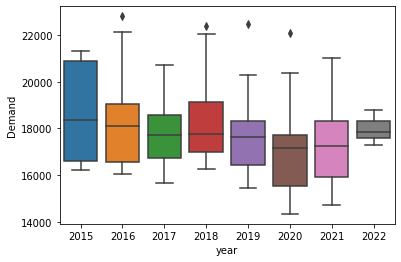

In [30]:
sns.boxplot(x='year', y='Demand', data=df)

In [41]:
df['top_quantile'] = 0
df['bottom_quantile'] = 0

In [42]:
for year in df['year'].unique():
  top_quantile = df[df['year'] == year].quantile(0.9)[0]
  bottom_quantile = df[df['year'] == year].quantile(0.1)[0]
  df['top_quantile'][df['year'] == year] = top_quantile
  df['bottom_quantile'][df['year'] == year] = bottom_quantile

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist

In [43]:
df

,Date(YMD),Demand,year,top_quantile,bottom_quantile
0,2015-07-01,21312,2012,21305.5,16332.0
1,2015-08-01,21299,2012,21305.5,16332.0
2,2015-09-01,19707,2012,21305.5,16332.0
3,2015-10-01,16206,2012,21305.5,16332.0
4,2015-11-01,16458,2012,21305.5,16332.0
...,...,...,...,...,...
76,2021-11-01,16113,2021,20016.1,15240.1
77,2021-12-01,16997,2021,20016.1,15240.1
78,2022-01-01,18772,2022,18591.2,17419.2
79,2022-02-01,17868,2022,18591.2,17419.2


In [54]:
anomaly_dates = df[(df['Demand'] > df['top_quantile']) | (df['Demand'] < df['bottom_quantile'])]['Date(YMD)']

In [55]:
anomaly_dates

0     2015-07-01
3     2015-10-01
9     2016-04-01
12    2016-07-01
13    2016-08-01
15    2016-10-01
21    2017-04-01
22    2017-05-01
24    2017-07-01
25    2017-08-01
33    2018-04-01
34    2018-05-01
36    2018-07-01
37    2018-08-01
45    2019-04-01
46    2019-05-01
48    2019-07-01
49    2019-08-01
57    2020-04-01
58    2020-05-01
60    2020-07-01
61    2020-08-01
69    2021-04-01
70    2021-05-01
72    2021-07-01
73    2021-08-01
78    2022-01-01
80    2022-03-01
Name: Date(YMD), dtype: object